# Big Data Coursework - "UK Department for Transport"
This notebook is a model evaluation report on a dataset built using the data files from the UK road safety website available at https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data Orginal data files names: " Road Safety- Vehicles last 5 years", "Road Safety- Collisions last 5 years"

# Table of Contents

1. Importing Libraries and Preparing Environment
2. Business Objective
3. Data Loading
4. Data splitting and Preprocessing
5. Feature selection 
6. Baseline method
7. Hyperparameter tuning
8. Model evaluation
9. Conclusion
10. Possible future improvements 

# 1. Importing Libraries and Preparing Environment

In [1]:
#Base Libraries
import pandas as pd #for working with tabular data
import numpy as np #for numerical arrays and mathematical operations
from sklearn.model_selection import train_test_split

# 2. Business Objective

Enhancing car safety involves understanding factors influencing accident severity to refine vehicle designs, such as reinforcing side panels for T-bone collisions for example. Utilizing models helps prioritize resources for new safety features, focusing on areas with the highest impact on reducing severity. This knowledge also informs insurance strategies by assessing accident risks across car types and usage scenarios, shaping pricing and coverage options accordingly. Safer cars translate to reduced injuries, fatalities, and repair costs, benefiting both manufacturers and customers. Moreover, emphasizing data-driven safety measures can establish a competitive advantage, showcasing a commitment to consumer well-being. Overall, leveraging machine learning enhances safety, lowers costs, and boosts market competitiveness.
In this report, the team would be focusing on a single car model(Ford Fiesta) to build a minimum viable product(mvp) ML model. 

# 3. Data Loading

In [2]:
Ford_fiesta_df = pd.read_csv('Ford_models.csv')
Ford_fiesta_df.head()

,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,propulsion_code,age_of_vehicle,accident_severity,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site
0,Going ahead other,Back,1242,Petrol,5,2,1,Single carriageway,Daylight,Fine no high winds,Dry,NaN
1,Moving off,Front,998,Petrol,4,1,1,Single carriageway,Daylight,Fine no high winds,Dry,NaN
2,Going ahead other,Nearside,998,Petrol,1,1,1,Dual carriageway,Darkness - lights unlit,Fine no high winds,Dry,NaN
3,Slowing or stopping,Back,998,Petrol,0,2,2,Dual carriageway,Daylight,Fine no high winds,Dry,NaN
4,Parked,Back,1242,Petrol,5,2,2,Dual carriageway,Daylight,Fine no high winds,Dry,NaN


# 4. Data Splitting and preprocessing

In [3]:
# splitting the data into independent and dependent variables
X = Ford_fiesta_df.drop('accident_severity', axis=1)
y = Ford_fiesta_df['accident_severity']
 
#Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 6084
Testing set size: 1522


In [4]:
y.value_counts(['accident_severity'])

accident_severity
2    0.811070
1    0.176966
0    0.011964
Name: proportion, dtype: float64

In [5]:
y_train.value_counts(['accident_severity'])

accident_severity
2    0.810980
1    0.177022
0    0.011999
Name: proportion, dtype: float64

In [6]:
y_test.value_counts(['accident_severity'])

accident_severity
2    0.811432
1    0.176741
0    0.011827
Name: proportion, dtype: float64

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7606 entries, 0 to 7605
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   vehicle_manoeuvre           7606 non-null   object
 1   first_point_of_impact       7606 non-null   object
 2   engine_capacity_cc          7606 non-null   int64 
 3   propulsion_code             7606 non-null   object
 4   age_of_vehicle              7606 non-null   int64 
 5   number_of_casualties        7606 non-null   int64 
 6   road_type                   7606 non-null   object
 7   light_conditions            7606 non-null   object
 8   weather_conditions          7606 non-null   object
 9   road_surface_conditions     7606 non-null   object
 10  special_conditions_at_site  173 non-null    object
dtypes: int64(3), object(8)
memory usage: 653.8+ KB


In [8]:
X_train.head()

,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,propulsion_code,age_of_vehicle,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site
5238,Turn right,Back,1560,Heavy oil,5,1,Dual carriageway,Darkness - lights lit,Fine no high winds,Dry,NaN
711,Changing lane to left,Front,998,Petrol,4,2,Roundabout,Daylight,Fine no high winds,Dry,NaN
2148,Changing lane to right,Nearside,998,Petrol,5,1,One way street,Daylight,Fine no high winds,Dry,NaN
1387,Slowing or stopping,Front,1242,Petrol,5,3,Dual carriageway,Daylight,Fine no high winds,Dry,NaN
6908,Slowing or stopping,Front,1499,Heavy oil,4,1,Dual carriageway,Daylight,Fine no high winds,Wet or Damp,NaN


In [9]:
X_test.head()

,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,propulsion_code,age_of_vehicle,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site
2680,Slowing or stopping,Front,1242,Petrol,3,1,Single carriageway,Daylight,Fine no high winds,Dry,NaN
5487,Going ahead other,Back,1242,Petrol,5,1,Dual carriageway,Darkness - no lighting,Fine no high winds,Wet or Damp,NaN
4453,Going ahead other,Front,998,Petrol,4,1,Single carriageway,Darkness - lights lit,Fine no high winds,Dry,NaN
7212,Parked,Did not impact,998,Petrol,3,1,Single carriageway,Darkness - lights lit,Fine no high winds,Dry,NaN
7315,Parked,Back,1596,Petrol,5,1,One way street,Darkness - lights lit,Fine no high winds,Dry,NaN


Relabel encoding the categorical data for model evaluation 

In [10]:
from sklearn.preprocessing import LabelEncoder

 #Identify categorical columns
categorical_columns = ['propulsion_code','light_conditions','first_point_of_impact','road_surface_conditions', 'weather_conditions','vehicle_manoeuvre','engine_capacity_cc','road_type','special_conditions_at_site']


# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])

In [11]:
#Identify categorical columns
categorical_columns = ['propulsion_code','light_conditions','first_point_of_impact','road_surface_conditions', 'weather_conditions','vehicle_manoeuvre','engine_capacity_cc','road_type','special_conditions_at_site']

#Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    X_test[column] = label_encoder.fit_transform(X_test[column])

In [12]:
X_train.head()

,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,propulsion_code,age_of_vehicle,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site
5238,12,0,8,0,5,1,0,0,1,0,7
711,0,2,0,1,4,2,2,3,1,0,7
2148,1,3,0,1,5,1,1,3,1,0,7
1387,11,2,4,1,5,3,0,3,1,0,7
6908,11,2,7,0,4,1,0,3,1,4,7


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6084 entries, 5238 to 6294
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   vehicle_manoeuvre           6084 non-null   int32
 1   first_point_of_impact       6084 non-null   int32
 2   engine_capacity_cc          6084 non-null   int64
 3   propulsion_code             6084 non-null   int32
 4   age_of_vehicle              6084 non-null   int64
 5   number_of_casualties        6084 non-null   int64
 6   road_type                   6084 non-null   int32
 7   light_conditions            6084 non-null   int32
 8   weather_conditions          6084 non-null   int32
 9   road_surface_conditions     6084 non-null   int32
 10  special_conditions_at_site  6084 non-null   int32
dtypes: int32(8), int64(3)
memory usage: 380.2 KB


In [14]:
X_test.head()

,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,propulsion_code,age_of_vehicle,number_of_casualties,road_type,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site
2680,11,2,3,1,3,1,3,3,1,0,6
5487,3,0,3,1,5,1,0,2,1,4,6
4453,3,2,0,1,4,1,3,0,1,0,6
7212,9,1,0,1,3,1,3,0,1,0,6
7315,9,0,7,1,5,1,1,0,1,0,6


In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1522 entries, 2680 to 5750
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   vehicle_manoeuvre           1522 non-null   int32
 1   first_point_of_impact       1522 non-null   int32
 2   engine_capacity_cc          1522 non-null   int64
 3   propulsion_code             1522 non-null   int32
 4   age_of_vehicle              1522 non-null   int64
 5   number_of_casualties        1522 non-null   int64
 6   road_type                   1522 non-null   int32
 7   light_conditions            1522 non-null   int32
 8   weather_conditions          1522 non-null   int32
 9   road_surface_conditions     1522 non-null   int32
 10  special_conditions_at_site  1522 non-null   int32
dtypes: int32(8), int64(3)
memory usage: 95.1 KB


Changing the data type from integer to category for categorical columns that changed after label encoding. this would help prevent the models from infering or assuming any ordinality as it trains and test the data 

In [16]:
columns_to_convert = ['propulsion_code','light_conditions','first_point_of_impact','road_surface_conditions', 'weather_conditions','vehicle_manoeuvre','engine_capacity_cc','road_type','special_conditions_at_site']

# Convert the selected columns to integer64 data type
for column in columns_to_convert:
    X_test[column] = X_test[column].astype('category')

In [17]:
columns_to_convert = ['propulsion_code','light_conditions','first_point_of_impact','road_surface_conditions', 'weather_conditions','vehicle_manoeuvre','engine_capacity_cc','road_type','special_conditions_at_site']

# Convert the selected columns to integer64 data type
for column in columns_to_convert:
    X_train[column] = X_train[column].astype('category')

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6084 entries, 5238 to 6294
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   vehicle_manoeuvre           6084 non-null   category
 1   first_point_of_impact       6084 non-null   category
 2   engine_capacity_cc          6084 non-null   category
 3   propulsion_code             6084 non-null   category
 4   age_of_vehicle              6084 non-null   int64   
 5   number_of_casualties        6084 non-null   int64   
 6   road_type                   6084 non-null   category
 7   light_conditions            6084 non-null   category
 8   weather_conditions          6084 non-null   category
 9   road_surface_conditions     6084 non-null   category
 10  special_conditions_at_site  6084 non-null   category
dtypes: category(9), int64(2)
memory usage: 198.2 KB


# 5. Feature Selection
In this section a few  statistical methods were used to perform feature selection.the methods are listed below and results are printed :-
1. Chi-square analysis for categorical columns
2. Mutual information analysis and Anova test for categorical columns
3. T-test for numerical columns
Scaling was not carreied out on the numerical columns because both colums had same scale

# 5.1 Chi-square analysis for categorical columns

Feature: vehicle_manoeuvre
Chi-square score: 122.20861027694342
P-value: 7.045360213741001e-12
-------------
Feature: first_point_of_impact
Chi-square score: 79.67790111563771
P-value: 5.675828899504287e-14
-------------
Feature: engine_capacity_cc
Chi-square score: 18.010859360152384
P-value: 0.5866928537489067
-------------
Feature: propulsion_code
Chi-square score: 1.287497770179519
P-value: 0.5253193660312934
-------------
Feature: road_type
Chi-square score: 43.872036056513195
P-value: 6.015232876806737e-07
-------------
Feature: light_conditions
Chi-square score: 51.40160965376292
P-value: 2.4598562656904266e-09
-------------
Feature: weather_conditions
Chi-square score: 22.52557859290492
P-value: 0.03203452327647596
-------------
Feature: road_surface_conditions
Chi-square score: 6.212120865816258
P-value: 0.6234845022563771
-------------
Feature: special_conditions_at_site
Chi-square score: 11.35868649268534
P-value: 0.6576569119546434
-------------


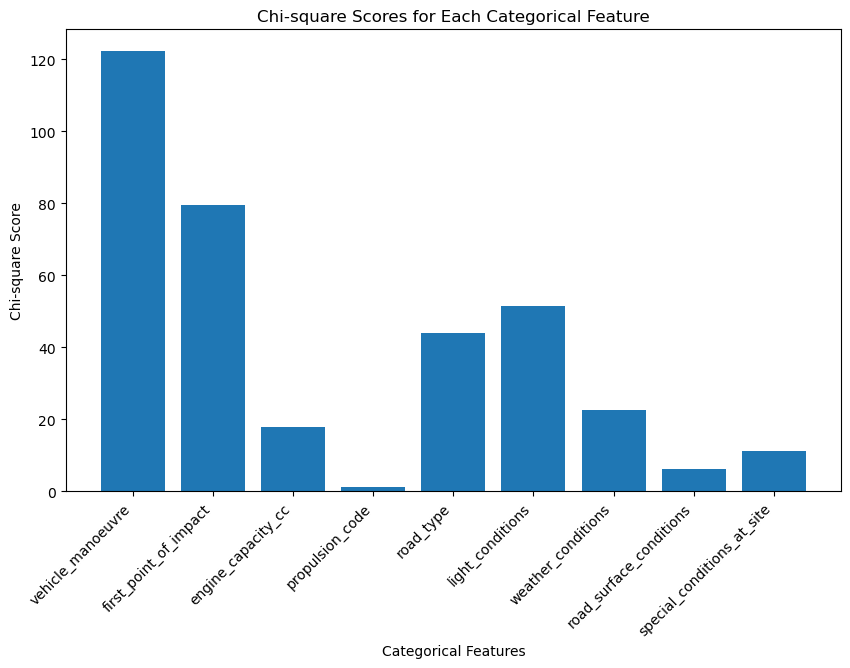

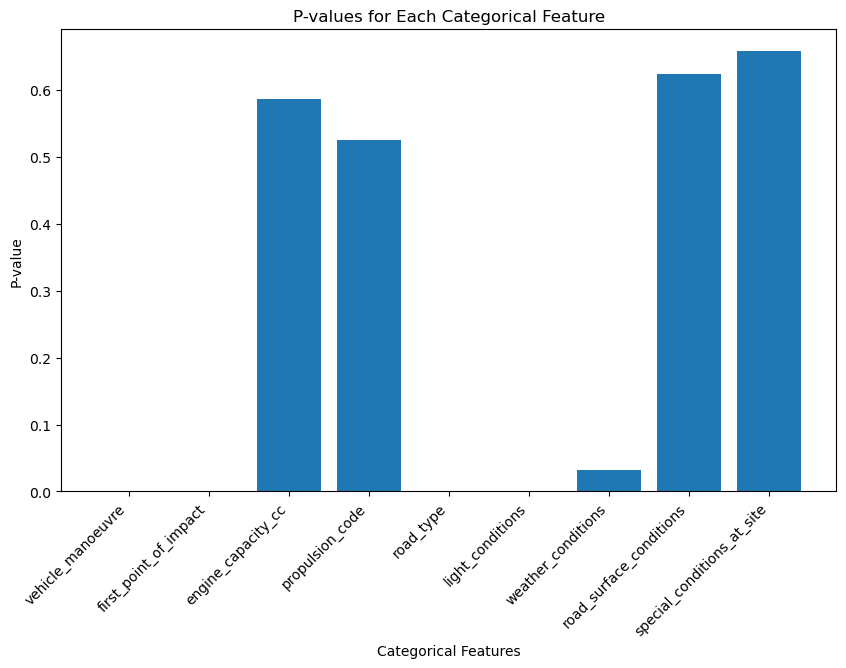

Selected features based on significance level (alpha = 0.05 ):
['vehicle_manoeuvre', 'first_point_of_impact', 'road_type', 'light_conditions', 'weather_conditions']


In [19]:
from scipy.stats import chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt


# Filter only categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

# Compute the contingency table between each categorical feature and the target variable
chi2_scores = []
p_values = []

for feature in categorical_columns:
    contingency_table = pd.crosstab(X_train[feature], y_train)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p)

# Print the chi-square scores and p-values for each feature
for feature, chi2_score, p_value in zip(categorical_columns, chi2_scores, p_values):
    print("Feature:", feature)
    print("Chi-square score:", chi2_score)
    print("P-value:", p_value)
    print("-------------")

# Plot chi-square scores
plt.figure(figsize=(10, 6))
plt.bar(categorical_columns, chi2_scores)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categorical Features')
plt.ylabel('Chi-square Score')
plt.title('Chi-square Scores for Each Categorical Feature')
plt.show()

# Plot p-values
plt.figure(figsize=(10, 6))
plt.bar(categorical_columns, p_values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categorical Features')
plt.ylabel('P-value')
plt.title('P-values for Each Categorical Feature')
plt.show()


# Set your significance level (alpha)
alpha = 0.05  

# Create a list to store the selected features
selected_features = []

# Iterate through each feature and its corresponding p-value
for feature, p_value in zip(categorical_columns, p_values):
    # Check if the p-value is below the significance level
    if p_value < alpha:
        # If significant, add the feature to the list of selected features
        selected_features.append(feature)

# Print the selected features
print("Selected features based on significance level (alpha =", alpha, "):")
print(selected_features)



In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Initialize SelectKBest to select features based on chi2 scores
selector = SelectKBest(score_func=chi2, k='all')

# Fit the selector to the training data with only categorical columns
selector.fit(X_train[categorical_columns], y_train)

# Get the chi2 scores and p-values
chi2_scores = selector.scores_
p_values = selector.pvalues_

# Set your significance level (alpha)
alpha = 0.05  

# Create a list to store the selected features
selected_features = []

# Iterate through each feature and its corresponding p-value
for feature, chi2_score, p_value in zip(categorical_columns, chi2_scores, p_values):
    # Check if the p-value is below the significance level
    if p_value < alpha:
        # If significant, add the feature to the list of selected features
        selected_features.append(feature)

# Print the selected features
print("Selected features based on significance level (alpha =", alpha, "):")
print(selected_features)



Selected features based on significance level (alpha = 0.05 ):
['vehicle_manoeuvre', 'first_point_of_impact', 'engine_capacity_cc', 'road_type', 'light_conditions']


# 5.2 Mutual information analysis and Anova test for categorical columns 

In [21]:
from sklearn.feature_selection import mutual_info_classif, f_classif

# Filter only categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

# Compute mutual information scores for feature selection for categorical columns
mutual_info_scores = mutual_info_classif(X_train[categorical_columns], y_train)

# Print mutual information scores for each feature
for feature, score in zip(categorical_columns, mutual_info_scores):
    print("Feature:", feature)
    print("Mutual Information Score:", score)
    print("-------------")

# Compute ANOVA F-values for feature selection for categorical columns
f_values, p_values = f_classif(X_train[categorical_columns], y_train)

# Print ANOVA F-values and p-values for each feature
for feature, f_value, p_value in zip(categorical_columns, f_values, p_values):
    print("Feature:", feature)
    print("ANOVA F-value:", f_value)
    print("P-value:", p_value)
    print("-------------")
from sklearn.feature_selection import SelectKBest

# Filter only categorical columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

# Select the top k features based on mutual information scores for categorical columns
k_best_mutual_info = SelectKBest(mutual_info_classif, k=5)
X_train_selected_mutual_info = k_best_mutual_info.fit_transform(X_train[categorical_columns], y_train)

# Get the indices of the selected features
selected_features_indices_mutual_info = k_best_mutual_info.get_support(indices=True)

# Print the actual feature names selected based on mutual information scores
selected_features_mutual_info = categorical_columns[selected_features_indices_mutual_info]
print("Selected features based on mutual information scores:")
print(selected_features_mutual_info)

# Select the top k features based on ANOVA F-values for categorical columns
k_best_f_values = SelectKBest(f_classif, k=3)
X_train_selected_f_values = k_best_f_values.fit_transform(X_train[categorical_columns], y_train)

# Get the indices of the selected features
selected_features_indices_f_values = k_best_f_values.get_support(indices=True)

# Print the actual feature names selected based on ANOVA F-values
selected_features_f_values = categorical_columns[selected_features_indices_f_values]
print("Selected features based on ANOVA F-values:")
print(selected_features_f_values)


Feature: vehicle_manoeuvre
Mutual Information Score: 0.006921517681239386
-------------
Feature: first_point_of_impact
Mutual Information Score: 0.008114111538655155
-------------
Feature: engine_capacity_cc
Mutual Information Score: 0.004027127366840633
-------------
Feature: propulsion_code
Mutual Information Score: 0.0
-------------
Feature: road_type
Mutual Information Score: 0.0033637281778091666
-------------
Feature: light_conditions
Mutual Information Score: 0.0
-------------
Feature: weather_conditions
Mutual Information Score: 0.004917017578152105
-------------
Feature: road_surface_conditions
Mutual Information Score: 0.0
-------------
Feature: special_conditions_at_site
Mutual Information Score: 0.0
-------------
Feature: vehicle_manoeuvre
ANOVA F-value: 13.272212865057762
P-value: 1.772128228926684e-06
-------------
Feature: first_point_of_impact
ANOVA F-value: 14.779626243128845
P-value: 3.952209191268821e-07
-------------
Feature: engine_capacity_cc
ANOVA F-value: 1.3445

# 5.3. T-test for numerical columns

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import ttest_ind

class SelectTTest(BaseEstimator, TransformerMixin):
    def __init__(self, alpha=0.05):
        self.alpha = alpha
        self.selected_continuous_features = []

    def fit(self, X, y):
        for feature in X.columns:
            t_statistic, p_value = ttest_ind(X[feature], y)
            if p_value < self.alpha:
                self.selected_continuous_features.append(feature)
        return self

    def transform(self, X):
        return X[self.selected_continuous_features]

continuous_features=['age_of_vehicle','number_of_casualties']
# Initialize SelectTTest
selector = SelectTTest(alpha=0.05)

# Fit the transformer to the training data
selector.fit(X_train[continuous_features], y_train)

# Get the selected continuous features
selected_continuous_features = selector.selected_continuous_features

# Print the selected continuous features
print("Selected continuous features based on significance level (alpha =", selector.alpha, "):")
print(selected_continuous_features)


Selected continuous features based on significance level (alpha = 0.05 ):
['age_of_vehicle', 'number_of_casualties']


Based on the results from the various statistical methods based on a 0.05 threshold. The train and test set were updated with best features.

In [23]:
X_train=X_train.loc[:,['vehicle_manoeuvre', 'first_point_of_impact', 'engine_capacity_cc', 'road_type', 'light_conditions','age_of_vehicle', 'number_of_casualties']]
X_test=X_test.loc[:,['vehicle_manoeuvre', 'first_point_of_impact', 'engine_capacity_cc', 'road_type', 'light_conditions','age_of_vehicle', 'number_of_casualties']]

# 5. Baseline method
As the dataset is made up of majorly categorical data. A decision tree model was selected to serve as baseline model. This model tended to favour the majority class but did poorly on the minority classes.Attempts would be made to improve this in the next section 

Accuracy: 0.7129
Confusion Matrix:
[[   1    5   12]
 [  12   45  212]
 [  20  176 1039]]


Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.06      0.04        18
           1       0.20      0.17      0.18       269
           2       0.82      0.84      0.83      1235

    accuracy                           0.71      1522
   macro avg       0.35      0.35      0.35      1522
weighted avg       0.70      0.71      0.71      1522





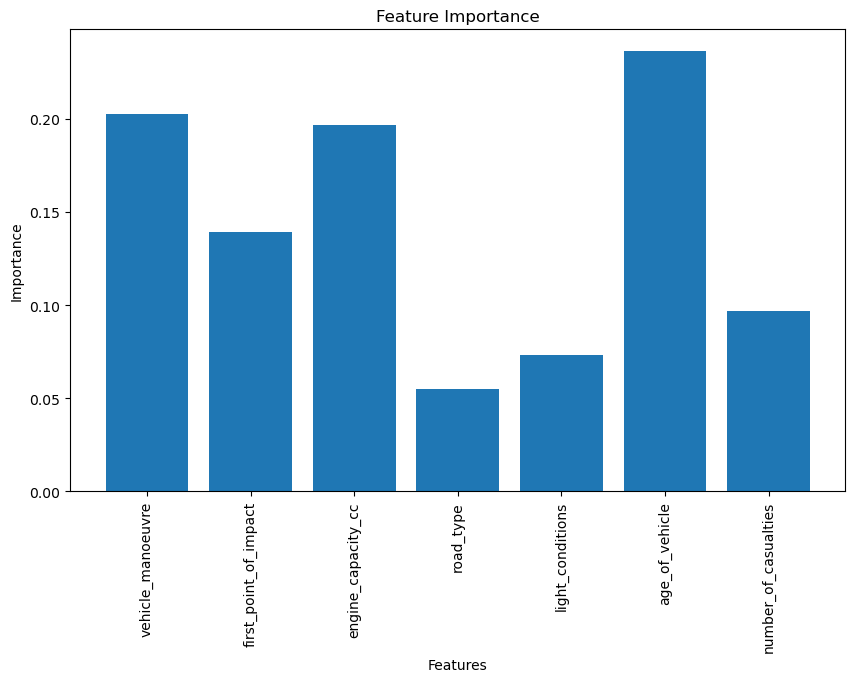

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(dt_classifier.feature_importances_)), dt_classifier.feature_importances_)
plt.xticks(range(len(dt_classifier.feature_importances_)), X_train.columns, rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# 7. Hyperparameter tuning and 8. Model Evaluation

In Section, a pipeline was set to specifically focus on dealing with imbalance in the dataset by running different models with and without resampling techniques using a gridsearch to hypertune the parameters of each model and compare results based on features that have the best f1 macro score. Here's what each part of the code is doing:

1. **Importing Libraries**: It imports necessary libraries from scikit-learn, imbalanced-learn, and XGBoost.

2. **Defining Feature Names**: It defines the names of the features in the dataset.

3. **Defining Sampling Strategy**: It defines different sampling strategies for dealing with class imbalance. Class imbalance occurs when one class in the target variable has significantly fewer samples than the other class(es).

4. **Defining Resampling Techniques**: It sets up different resampling techniques including no resampling, SMOTE (Synthetic Minority Over-sampling Technique), SMOTENC (SMOTE for continuous and categorical features), random oversampling, and random undersampling. These techniques are used to create a more balanced dataset for training the models.

5. **Defining Parameter Grids**: It defines the grid of hyperparameters to be searched during cross-validation for each classifier. This is used for hyperparameter tuning.

6. **Defining Classifiers**: It defines classifiers including Balanced Random Forest, AdaBoost, and XGBoost along with their respective parameter grids for hyperparameter tuning.

7. **Defining Print Feature Importance Function**: It defines a function to print feature importance for models that support it.

8. **Defining Compare Feature Combinations Function**: It defines a function to compare different feature combinations based on their F1 macro score. It selects the best features based on importance and evaluates the classifier using those features.

9. **Looping over Resampling Techniques and Classifiers**: It loops over each resampling technique and classifier combination, fits the classifier using grid search for hyperparameter tuning, evaluates the classifier's performance using F1 macro score, confusion matrix, and classification report, and prints feature importance and comparison of feature combinations.

Overall, this  provides a comprehensive pipeline for dealing with imbalanced datasets, tuning classifier parameters, and evaluating model performance. It's a structured approach to building and evaluating classification models in machine learning.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier  
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTENC  
from sklearn.metrics import f1_score

# Define feature names
feature_names = ['light_conditions','first_point_of_impact','vehicle_manoeuvre','engine_capacity_cc','road_type','age_of_vehicle', 'number_of_casualties']

# Define sampling strategy
sampling_strategy = {0: 2500, 1: 3500, 2: 5000}
sampling_strategy2 = {0: 73, 1: 100 , 2: 146}

# Define resampling techniques
resampling_techniques = {
    'No Resampling': None,
    'SMOTE': SMOTE(sampling_strategy=sampling_strategy, random_state=42),
    'SMOTENC': SMOTENC(sampling_strategy=sampling_strategy, categorical_features=[0,1,2,3,4], random_state=42),
    'RandomOverSampler': RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42),
    'RandomUnderSampler': RandomUnderSampler(sampling_strategy=sampling_strategy2, random_state=42),
}

# Define parameter grids for each classifier
param_grid_rf = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 20, 25],
    'min_samples_split': [2, 5, 10]
}

param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

param_grid_xgb = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Define classifiers
classifiers = {
    'Balanced Random Forest': (BalancedRandomForestClassifier(random_state=42,sampling_strategy='all',replacement=True), param_grid_rf),
    'AdaBoost': (AdaBoostClassifier(random_state=42), param_grid_ab),
    'XGBoost': (XGBClassifier(random_state=42,enable_categorical=True), param_grid_xgb)
}

# Define a function to print feature importance
def print_feature_importance(classifier, feature_names):
    if hasattr(classifier, 'feature_importances_'):
        print("Feature Importance:")
        for feature_name, importance in zip(feature_names, classifier.feature_importances_):
            print(f"{feature_name}: {importance:.4f}")
        print("\n")

# Define a function to compare feature combinations       
def compare_feature_combinations(classifier, X_train, y_train, X_test, y_test, feature_names):
    best_score = 0
    best_features = None
    best_confusion_matrix = None
    best_classification_report = None

    for n_features in range(1, len(feature_names) + 1):
        # Select top n_features based on importance
        selector = SelectFromModel(classifier, max_features=n_features)
        selector.fit(X_train, y_train)
        X_train_selected = selector.transform(X_train)
        X_test_selected = selector.transform(X_test)
        
        # If no features are selected, continue to the next iteration
        if not np.any(selector.get_support()):
            continue
        
        # Train classifier with selected features
        classifier.fit(X_train_selected, y_train)
        
        # Evaluate classifier using F1 macro score
        score = f1_score(y_train, classifier.predict(X_train_selected), average='macro')
        
        # Update best features if score improves
        if score > best_score:
            best_score = score
            best_features = [feature_names[i] for i, feature_mask in enumerate(selector.get_support()) if feature_mask]
            best_confusion_matrix = confusion_matrix(y_test, classifier.predict(X_test_selected))
            best_classification_report = classification_report(y_test, classifier.predict(X_test_selected))
            
    # After the loop completes, print the evaluation metrics for the overall best features
    print(f"Best features based on train set: {best_features} with F1 macro score: {best_score:.4f}\n")
    print("Overall Confusion Matrix based on test set:")
    print(best_confusion_matrix)
    print("\n")
    print("Overall Classification Report based on test set:")
    print(best_classification_report)
    print("\n")

# Loop over resampling techniques
for resampling_name, resampling_technique in resampling_techniques.items():
    print(f"Resampling Technique: {resampling_name}")
    
    if resampling_name != 'No Resampling':
        X_train_resampled, y_train_resampled = resampling_technique.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train

    # Loop over classifiers
    for clf_name, (clf, param_grid) in classifiers.items():
        print(f"Classifier: {clf_name}")
        
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro')
        grid_search.fit(X_train_resampled, y_train_resampled)
        
        print("Best parameters found:")
        print(grid_search.best_params_)
        
        best_clf = grid_search.best_estimator_
        y_pred = best_clf.predict(X_test)
        
        # Calculate F1 macro score
        f1_macro = f1_score(y_test, y_pred, average='macro')
        print(f"F1 macro score: {f1_macro:.4f}")

        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\n")

        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("\n")

        # Print feature importance
        print_feature_importance(best_clf, feature_names)

        # Compare feature combinations
        compare_feature_combinations(best_clf, X_train_resampled, y_train_resampled, X_test, y_test, feature_names)


Resampling Technique: No Resampling
Classifier: Balanced Random Forest
Best parameters found:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 1000}
F1 macro score: 0.3122
Confusion Matrix:
[[  9   5   4]
 [ 90  98  81]
 [275 362 598]]


Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.50      0.05        18
           1       0.21      0.36      0.27       269
           2       0.88      0.48      0.62      1235

    accuracy                           0.46      1522
   macro avg       0.37      0.45      0.31      1522
weighted avg       0.75      0.46      0.55      1522



Feature Importance:
light_conditions: 0.1905
first_point_of_impact: 0.1368
vehicle_manoeuvre: 0.1443
engine_capacity_cc: 0.0874
road_type: 0.1075
age_of_vehicle: 0.1977
number_of_casualties: 0.1357


Best features based on train set: ['light_conditions', 'vehicle_manoeuvre', 'age_of_vehicle'] with F1 macro score: 0.2921

Overall Confusion Matrix

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best features based on train set: ['light_conditions'] with F1 macro score: 0.2985

Overall Confusion Matrix based on test set:
[[   0    0   18]
 [   0    0  269]
 [   0    0 1235]]


Overall Classification Report based on test set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00       269
           2       0.81      1.00      0.90      1235

    accuracy                           0.81      1522
   macro avg       0.27      0.33      0.30      1522
weighted avg       0.66      0.81      0.73      1522



Classifier: XGBoost
Best parameters found:
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 500}
F1 macro score: 0.3372
Confusion Matrix:
[[   0    4   14]
 [   5   29  235]
 [  10   94 1131]]


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.23      0.11      0.15      

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr

Best features based on train set: ['light_conditions', 'vehicle_manoeuvre'] with F1 macro score: 0.3066

Overall Confusion Matrix based on test set:
[[   0    0   18]
 [   0    1  268]
 [   0    3 1232]]


Overall Classification Report based on test set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.25      0.00      0.01       269
           2       0.81      1.00      0.90      1235

    accuracy                           0.81      1522
   macro avg       0.35      0.33      0.30      1522
weighted avg       0.70      0.81      0.73      1522



Resampling Technique: SMOTE
Classifier: Balanced Random Forest
Best parameters found:
{'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 1000}
F1 macro score: 0.3303
Confusion Matrix:
[[  4   5   9]
 [ 31  84 154]
 [131 340 764]]


Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.22      0.04  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best features based on train set: ['light_conditions', 'vehicle_manoeuvre'] with F1 macro score: 0.2694

Overall Confusion Matrix based on test set:
[[   1    4   13]
 [  25   30  214]
 [ 104   92 1039]]


Overall Classification Report based on test set:
              precision    recall  f1-score   support

           0       0.01      0.06      0.01        18
           1       0.24      0.11      0.15       269
           2       0.82      0.84      0.83      1235

    accuracy                           0.70      1522
   macro avg       0.36      0.34      0.33      1522
weighted avg       0.71      0.70      0.70      1522



Classifier: XGBoost
Best parameters found:
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 100}
F1 macro score: 0.3364
Confusion Matrix:
[[  3   6   9]
 [ 23  80 166]
 [109 314 812]]


Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.17      0.04        18
           1       0.20      0.30    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best features based on train set: ['light_conditions', 'first_point_of_impact', 'vehicle_manoeuvre', 'road_type'] with F1 macro score: 0.6097

Overall Confusion Matrix based on test set:
[[  2   9   7]
 [ 40  70 159]
 [131 279 825]]


Overall Classification Report based on test set:
              precision    recall  f1-score   support

           0       0.01      0.11      0.02        18
           1       0.20      0.26      0.22       269
           2       0.83      0.67      0.74      1235

    accuracy                           0.59      1522
   macro avg       0.35      0.35      0.33      1522
weighted avg       0.71      0.59      0.64      1522



Resampling Technique: SMOTENC
Classifier: Balanced Random Forest
Best parameters found:
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 1000}
F1 macro score: 0.3323
Confusion Matrix:
[[  1   3  14]
 [ 23  63 183]
 [112 238 885]]


Classification Report:
              precision    recall  f1-score   support

           0  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr

Best features based on train set: ['light_conditions', 'vehicle_manoeuvre', 'engine_capacity_cc'] with F1 macro score: 0.4962

Overall Confusion Matrix based on test set:
[[  5   4   9]
 [ 58  55 156]
 [258 235 742]]


Overall Classification Report based on test set:
              precision    recall  f1-score   support

           0       0.02      0.28      0.03        18
           1       0.19      0.20      0.20       269
           2       0.82      0.60      0.69      1235

    accuracy                           0.53      1522
   macro avg       0.34      0.36      0.31      1522
weighted avg       0.70      0.53      0.60      1522



Classifier: XGBoost
Best parameters found:
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000}
F1 macro score: 0.3422
Confusion Matrix:
[[  1   4  13]
 [ 21  60 188]
 [ 89 209 937]]


Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.06      0.02        18
           1       0.22

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best features based on train set: ['light_conditions', 'first_point_of_impact'] with F1 macro score: 0.4479

Overall Confusion Matrix based on test set:
[[  8   1   9]
 [ 94  32 143]
 [396  67 772]]


Overall Classification Report based on test set:
              precision    recall  f1-score   support

           0       0.02      0.44      0.03        18
           1       0.32      0.12      0.17       269
           2       0.84      0.63      0.72      1235

    accuracy                           0.53      1522
   macro avg       0.39      0.40      0.31      1522
weighted avg       0.73      0.53      0.61      1522



Resampling Technique: RandomOverSampler
Classifier: Balanced Random Forest
Best parameters found:
{'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 1000}
F1 macro score: 0.3388
Confusion Matrix:
[[  2   7   9]
 [ 23  85 161]
 [ 77 335 823]]


Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.11     

Best features based on train set: ['light_conditions', 'first_point_of_impact', 'road_type'] with F1 macro score: 0.6084

Overall Confusion Matrix based on test set:
[[  6   1  11]
 [ 59  78 132]
 [197 284 754]]


Overall Classification Report based on test set:
              precision    recall  f1-score   support

           0       0.02      0.33      0.04        18
           1       0.21      0.29      0.25       269
           2       0.84      0.61      0.71      1235

    accuracy                           0.55      1522
   macro avg       0.36      0.41      0.33      1522
weighted avg       0.72      0.55      0.62      1522





# Conclusion and Analysis of Accident Severity Prediction Experiment

This experiment aimed to predict accident severity (classified as fatal, severe, or slight) based on various features, including car attributes, road type, and weather conditions. Multiple classification algorithms were employed (Balanced Random Forest, AdaBoost, and XGBoost), with varying resampling techniques to address class imbalances. Here is a detailed analysis of the findings.

## Key Observations

### 1. Class Imbalance and Model Performance
- The dataset exhibited a significant class imbalance, with the majority of records classified as “fatal” (class 2) and far fewer instances of “severe” (class 1) or “slight” (class 0) accidents.
- Most models struggled to effectively predict the minority classes, particularly the “slight” accidents. For instance, the recall and precision for class 0 remained consistently low across all models, reflecting difficulty in predicting this class.
- The severe accidents (class 1) were also challenging to predict, with low recall and F1 scores across classifiers.

### 2. Model and Resampling Technique Effectiveness
- **Balanced Random Forest** performed relatively well in several scenarios, particularly when paired with SMOTE and RandomOverSampler techniques. These approaches helped improve recall for class 1 and class 2, though class 0 predictions remained poor.
- **AdaBoost** and **XGBoost** achieved higher accuracy and weighted F1 scores, especially with RandomOverSampler, SMOTE, and SMOTENC resampling techniques. However, this was largely driven by correct predictions for the majority class (class 2). This pattern suggests these models prioritized accuracy for the dominant class at the expense of other classes.
- **Resampling Techniques**: SMOTE, SMOTENC, and RandomOverSampler generally enhanced the models’ ability to predict minority classes. RandomUnderSampler improved the recall for slight accidents (class 0) but at the cost of lower overall accuracy.

### 3. Model Scores and Metrics
- **F1 Macro Score**: The F1 macro scores for all models remained low, generally around 0.3 to 0.35, indicating a limited capacity to balance precision and recall across the three classes.
- **Weighted Scores**: While the weighted F1 and accuracy scores appeared reasonable (ranging between 0.6 to 0.8 in some cases), this was primarily due to the models’ success with the fatal accident class (class 2). Weighted scores, therefore, did not fully reflect each model's struggles with the minority classes.

### 4. Feature Importance
- The most influential features across models included **light conditions**, **age of vehicle**, and **vehicle maneuver**, which consistently appeared among the top-ranked variables. The high importance of these features indicates that factors like visibility, vehicle condition, and driver actions were influential in predicting accident severity.
- **Other Contributing Factors**: Features like **road type**, **first point of impact**, and **engine capacity** also played a significant role in model performance. This suggests that the physical context (e.g., road and impact) and car specifications (engine size) are relevant to accident severity.

## Limitations and Challenges
- **Poor Prediction of Minority Classes**: Despite various resampling techniques, the models struggled with predicting slight and severe accidents. This is particularly concerning for practical applications, where predicting less severe accidents could improve resource allocation and accident prevention strategies.
- **Limited F1 Macro Scores**: Although certain models, like XGBoost with SMOTE, achieved improved F1 macro scores, the scores remained low, indicating overall limitations in handling the multi-class imbalance.
- **Model Generalization**: The tendency of models to prioritize the majority class (fatal) suggests that they may lack the robustness needed for diverse and balanced accident severity prediction.

## Recommendations for Improvement
1. **Advanced Resampling or Ensemble Techniques**: Employing more sophisticated resampling techniques or hybrid ensemble methods may help better address class imbalance.
2. **Feature Engineering**: Further exploration of interaction terms between features or additional contextual factors (e.g., traffic volume or road condition variations) could provide insights into underlying patterns in accident severity.
3. **Alternative Algorithms**: Techniques such as cost-sensitive learning or anomaly detection methods, which could treat minor classes as “rare events,” may offer a different approach to capturing slight and severe accident cases.

## Final Thoughts
The experiment demonstrated the complexity of accurately predicting accident severity using conventional classifiers and resampling methods, especially in imbalanced scenarios. Balanced Random Forest and XGBoost with resampling techniques showed promise, but future efforts should focus on better addressing class imbalance and leveraging domain-specific features to achie both prediction quality and practical application in traffic safety initiatives.



In [28]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [29]:
import io
from nbformat import read, NO_CONVERT

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 1427
